
# Medical Appointments No-Show Analysis

## Introduction

This dataset contains information about 110,527 medical appointments and their associated variables, including whether patients showed up for their appointments. The dataset aims to help analyze and predict no-show patterns.

### Objectives:
- Identify key factors contributing to patient no-shows.
- Provide actionable insights to improve appointment attendance.
- Explore whether no-shows can be predicted based on patient and appointment characteristics.

### About the Dataset:
- **Source**: Reference to Joni Hoppen and Aquarela Analytics.
- **Content**: The dataset includes 14 variables such as patient demographics, appointment details, and health conditions.

### Objectives

- To understand patterns and trends in the data.
- To identify key factors associated with no-shows.
- To provide actionable insights for improving attendance rates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/KaggleV2-May-2016.csv")

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Convert date columns to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

In [8]:
# Standardize the 'No-show' column (convert 'Yes' to 1 and 'No' to 0)
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [9]:
# Check and handle anomalies in the 'Age' column
age_outliers = df[df['Age'] < 0]

# Clean 'Age' column (remove negative values)
df = df[df['Age'] >= 0]

In [10]:
# Rename columns for consistency
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)


In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [12]:
# Distribution of the target variable ('No-show')
no_show_distribution = df['No-show'].value_counts(normalize=True)

no_show_distribution

0    0.798066
1    0.201934
Name: No-show, dtype: float64

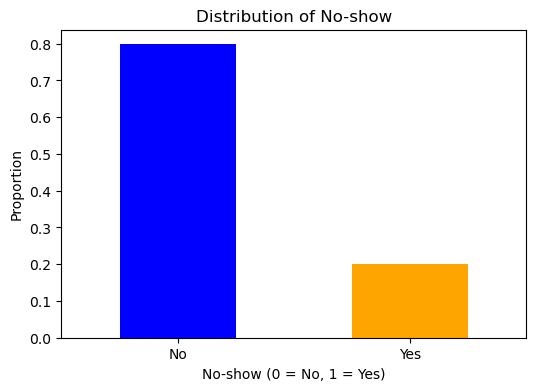

In [13]:
# Plotting distribution of the target variable
plt.figure(figsize=(6, 4))
no_show_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of No-show')
plt.xlabel('No-show (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

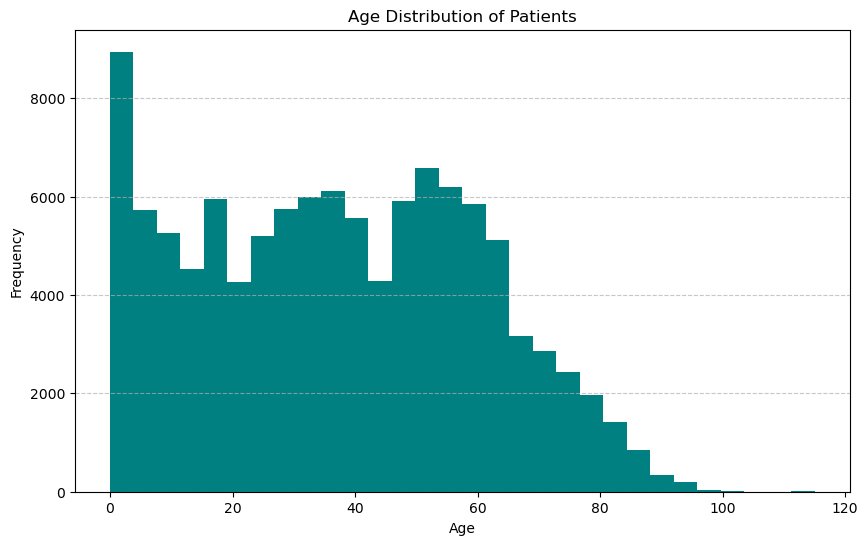

In [14]:
# Visualizing the distribution of age
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, alpha=1.0, color='teal')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Gender-based no-show rates
gender_no_show = df.groupby('Gender')['No-show'].mean()

In [16]:
gender_no_show

Gender
F    0.203149
M    0.199679
Name: No-show, dtype: float64

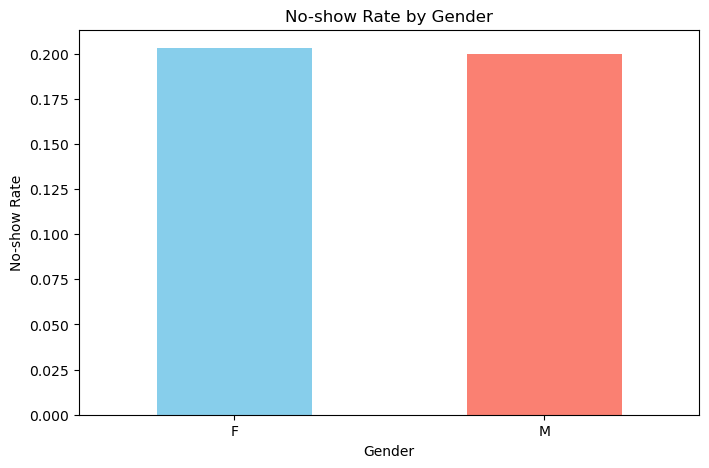

In [17]:
# Plotting gender-based no-show rates
plt.figure(figsize=(8, 5))
gender_no_show.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('No-show Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('No-show Rate')
plt.xticks(rotation=0)
plt.show()

In [18]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

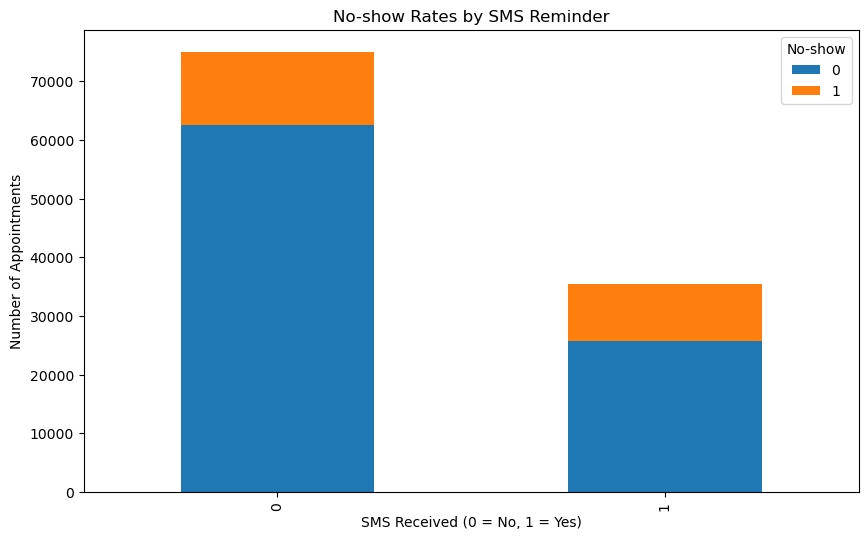

In [19]:
sms_no_show = df.groupby(['SMS_received', 'No-show']).size().unstack()
sms_no_show.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('No-show Rates by SMS Reminder')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.show()

In [20]:
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

In [21]:
# Analyzing no-show rate by age group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 115], 
                           labels=['0-18', '19-35', '36-50', '51-65', '66+'])

age_group_no_show = df.groupby('Age Group')['No-show'].mean()



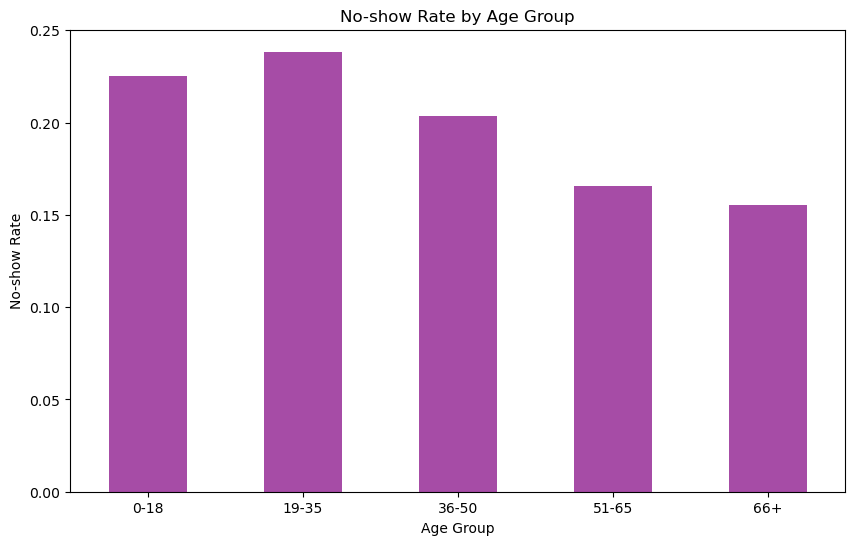

In [22]:
# Plotting no-show rates by age group
plt.figure(figsize=(10, 6))
age_group_no_show.plot(kind='bar', color='purple', alpha=0.7)
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.xticks(rotation=0)
plt.show()

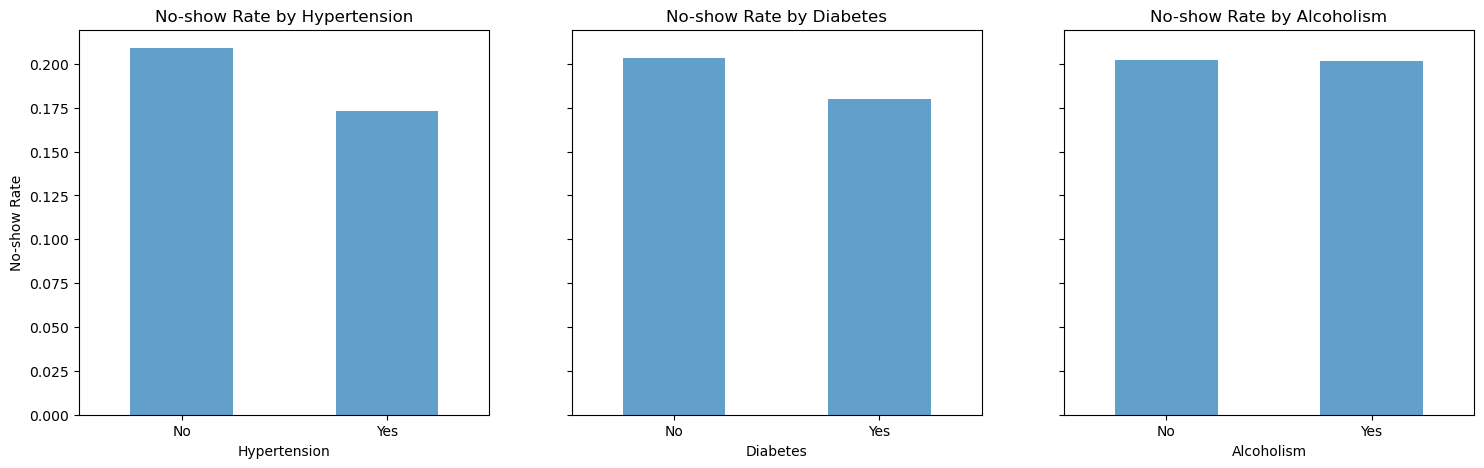

In [23]:
# analyze health indicators and their relationships with no-show rates
health_indicators = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
health_no_show_rates = df[health_indicators + ['No-show']].groupby(health_indicators).mean()['No-show']

# Visualizing no-show rates for health indicators
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for idx, col in enumerate(health_indicators[:-1]):
    df.groupby(col)['No-show'].mean().plot(kind='bar', ax=axes[idx], alpha=0.7)
    axes[idx].set_title(f'No-show Rate by {col}')
    axes[idx].set_ylabel('No-show Rate')
    axes[idx].set_xlabel(col)
    axes[idx].set_xticklabels(['No', 'Yes'], rotation=0)


Insights from Health-Related Analysis
Hypertension:

Patients with hypertension generally have lower no-show rates compared to those without.
Diabetes:

Similar to hypertension, diabetic patients tend to show up more often for appointments.
Alcoholism:

No significant deviation in no-show rates compared to non-alcoholic patients.


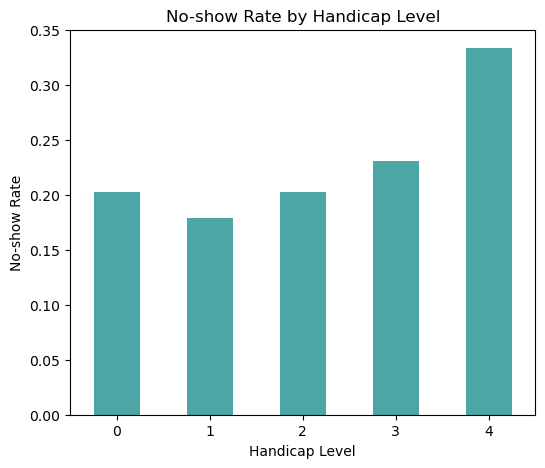

In [24]:
# Handicap as a multi-level category
handicap_no_show = df.groupby('Handicap')['No-show'].mean()
handicap_no_show.plot(kind='bar', figsize=(6, 5), color='teal', alpha=0.7)
plt.title('No-show Rate by Handicap Level')
plt.xlabel('Handicap Level')
plt.ylabel('No-show Rate')
plt.xticks(rotation=0)
plt.show()

Handicap:

Handicap levels show varying no-show rates:
No significant handicap (0) has higher no-show rates.
Higher levels of handicap (2, 3, 4) generally have lower no-show rates, but with fewer data points in these categories.

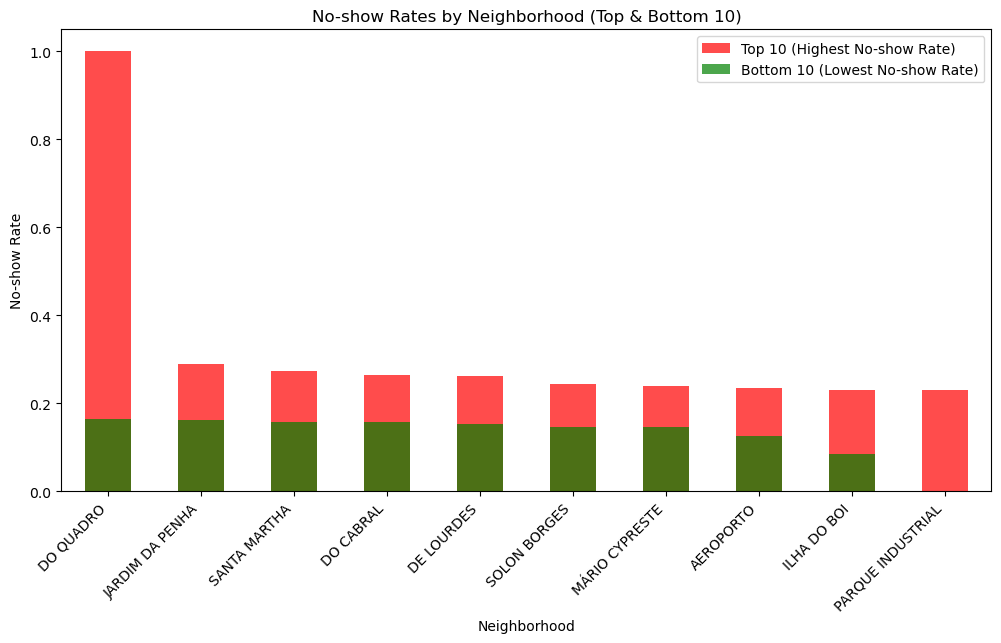

In [25]:
# Analyzing no-show rates by neighborhood
neighborhood_no_show = df.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False)

# Visualizing top and bottom 10 neighborhoods by no-show rate
plt.figure(figsize=(12, 6))
neighborhood_no_show[:10].plot(kind='bar', color='red', alpha=0.7, label='Top 10 (Highest No-show Rate)')
neighborhood_no_show[-10:].plot(kind='bar', color='green', alpha=0.7, label='Bottom 10 (Lowest No-show Rate)')
plt.title('No-show Rates by Neighborhood (Top & Bottom 10)')
plt.xlabel('Neighborhood')
plt.ylabel('No-show Rate')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Neighborhood Impact:

Neighborhoods like "ILHAS OCEÂNICAS DE TRINDADE" show a 100% no-show rate, though this might be due to a small number of cases.
Other neighborhoods like "SANTOS DUMONT" and "SANTA CECÍLIA" also have higher no-show rates, while neighborhoods not shown in the top list have much lower rates.

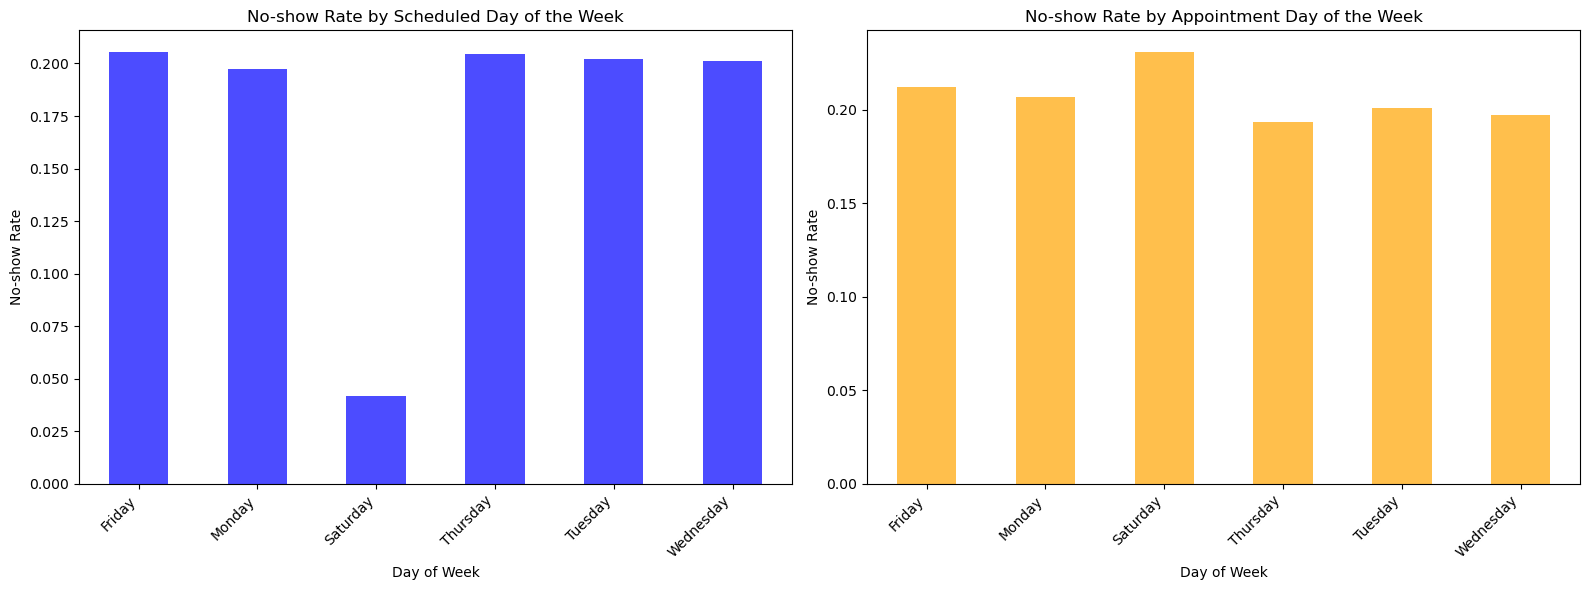

In [26]:
# Analyzing no-show rates by day of the week for ScheduledDay and AppointmentDay
df['ScheduledDayOfWeek'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

scheduled_day_no_show = df.groupby('ScheduledDayOfWeek')['No-show'].mean()
appointment_day_no_show = df.groupby('AppointmentDayOfWeek')['No-show'].mean()

# Visualizing no-show rates by day of the week
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
scheduled_day_no_show.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
ax[0].set_title('No-show Rate by Scheduled Day of the Week')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('No-show Rate')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

appointment_day_no_show.plot(kind='bar', ax=ax[1], color='orange', alpha=0.7)
ax[1].set_title('No-show Rate by Appointment Day of the Week')
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('No-show Rate')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Scheduled Day of the Week:

Appointments scheduled on Saturdays have the lowest no-show rates, likely reflecting lower patient volumes or unique scheduling circumstances.

Appointment Day of the Week:

Thursdays and Wednesdays see lower no-show rates compared to other days.
Saturdays have slightly higher no-show rates than weekdays, though they still see fewer appointments overall.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Feature Engineering

# Encode categorical variables (Gender, Neighbourhood, Day of Week)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # F: 0, M: 1
df['ScheduledDayOfWeek'] = label_encoder.fit_transform(df['ScheduledDayOfWeek'])
df['AppointmentDayOfWeek'] = label_encoder.fit_transform(df['AppointmentDayOfWeek'])

# Time-based feature: Days between scheduling and appointment
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Selecting features and target
features = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
            'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 
            'ScheduledDayOfWeek', 'AppointmentDayOfWeek', 'DaysBetween']
X = pd.get_dummies(df[features], columns=['Neighbourhood'])
y = df['No-show']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


((77368, 92), (33158, 92), 0.20193103091717507, 0.20194221605645696)

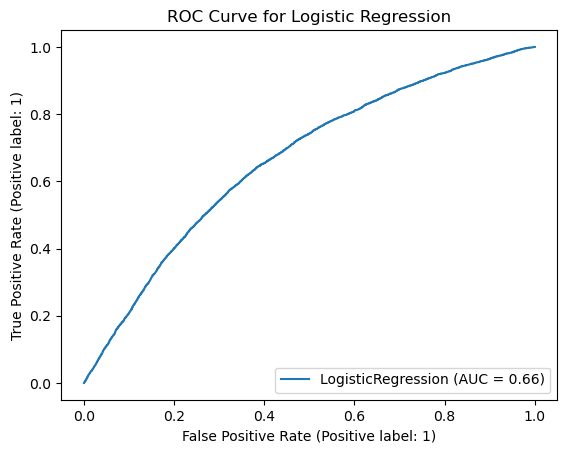

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26462
           1       0.36      0.01      0.03      6696

    accuracy                           0.80     33158
   macro avg       0.58      0.50      0.46     33158
weighted avg       0.71      0.80      0.71     33158
 0.6644103428852284 [[26284   178]
 [ 6596   100]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# Initialize and fit logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

print(classification_rep, roc_auc, conf_matrix)


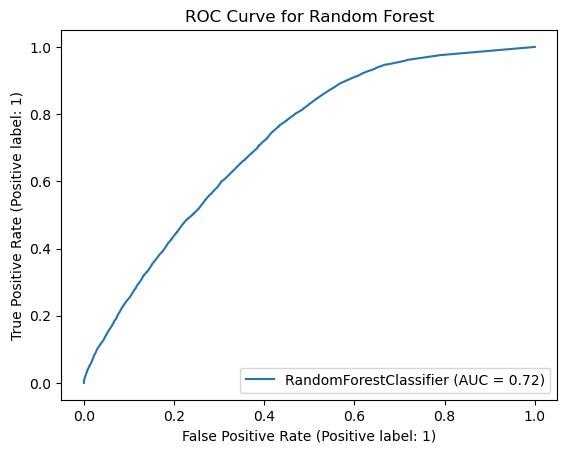

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     26462
           1       0.40      0.19      0.26      6696

    accuracy                           0.78     33158
   macro avg       0.61      0.56      0.57     33158
weighted avg       0.74      0.78      0.75     33158
 0.719721428608838 [[24566  1896]
 [ 5412  1284]]


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve for Random Forest')
plt.show()

print(classification_rep_rf, roc_auc_rf,   conf_matrix_rf)


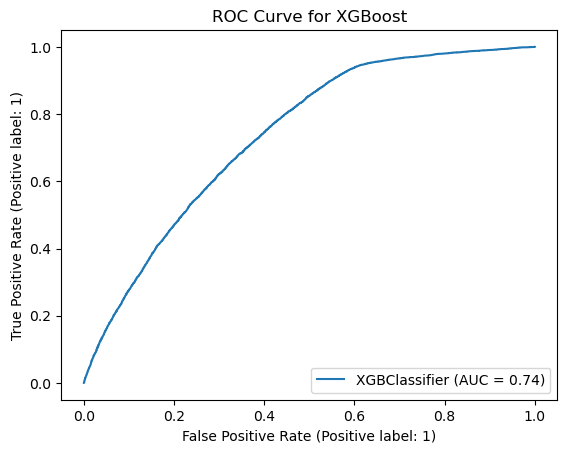

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.40      0.56     26462
           1       0.28      0.94      0.44      6696

    accuracy                           0.51     33158
   macro avg       0.62      0.67      0.50     33158
weighted avg       0.83      0.51      0.54     33158

ROC-AUC Score: 0.7376983068392204
Confusion Matrix:
 [[10519 15943]
 [  400  6296]]


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=10,  # Adjust for class imbalance
    learning_rate=0.1,    # Step size for optimization
    n_estimators=100,     # Number of boosting rounds
    max_depth=6,          # Maximum depth of trees
    random_state=42       # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Evaluate the model
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('ROC Curve for XGBoost')
plt.show()

# Print results
print("Classification Report:\n", classification_rep_xgb)
print("ROC-AUC Score:", roc_auc_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],       # Step size for optimization
    'max_depth': [4, 6, 8],                 # Maximum depth of trees
    'n_estimators': [50, 100, 200],         # Number of boosting rounds
    'scale_pos_weight': [5, 10, 15]         # Weight to balance class imbalance
}

# Initialize the XGBoost model
xgb_base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up Grid Search
grid_search = GridSearchCV(
    estimator=xgb_base_model,
    param_grid=param_grid,
    scoring='roc_auc',   # Optimize for AUC
    cv=3,                # 3-fold cross-validation
    verbose=2,           # Show progress
    n_jobs=-1            # Use all available cores
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50, 'scale_pos_weight': 5}


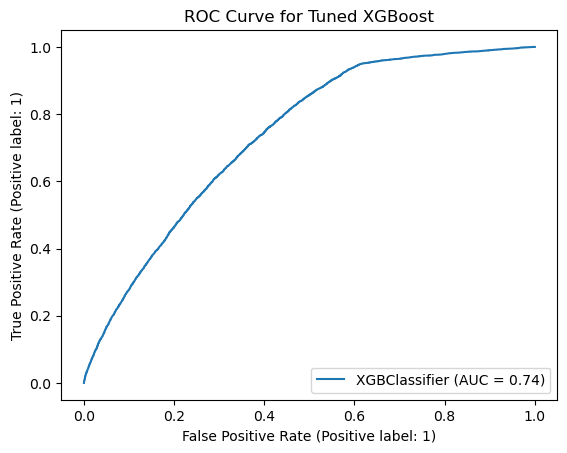

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.46      0.62     26462
           1       0.29      0.89      0.44      6696

    accuracy                           0.55     33158
   macro avg       0.62      0.68      0.53     33158
weighted avg       0.81      0.55      0.58     33158

ROC-AUC Score: 0.7377137253555446
Confusion Matrix:
 [[12213 14249]
 [  734  5962]]


In [32]:
# Predict on the test set
y_pred_best = best_xgb_model.predict(X_test)
y_pred_prob_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

classification_rep_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_prob_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Display ROC Curve
RocCurveDisplay.from_estimator(best_xgb_model, X_test, y_test)
plt.title('ROC Curve for Tuned XGBoost')
plt.show()

# Print results
print("Classification Report:\n", classification_rep_best)
print("ROC-AUC Score:", roc_auc_best)
print("Confusion Matrix:\n", conf_matrix_best)


Summary
Key findings from the analysis include:

- SMS reminders are associated with reduced no-show rates.
- Delays between scheduling and appointments are a significant factor in attendance.
- Certain demographic groups, such as younger or elderly patients, are more likely to no-show.

Recommendations

Based on the analysis:

- Send SMS reminders: Ensure all patients receive reminders, especially those with long delays.
- Targeted campaigns: Focus on neighborhoods and demographics with high no-show rates.
- Optimize scheduling: Minimize delays between scheduling and appointments.